In [33]:
import pandas as pd
path = 'data.csv'
df = pd.read_csv(path)
df

,date,station,job,ferie,vacances,y
0,2015-01-01,1J7,1,1,1,7
1,2015-01-01,O2O,1,1,1,0
2,2015-01-01,8QR,1,1,1,9
3,2015-01-01,UMC,1,1,1,9
4,2015-01-01,FK3,1,1,1,28
...,...,...,...,...,...,...
1229858,2022-12-31,V2P,0,0,1,1227
1229859,2022-12-31,N9K,0,0,1,544
1229860,2022-12-31,P6E,0,0,1,92
1229861,2022-12-31,BDC,0,0,1,91


In [34]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df = df.sort_values(by='date')

#df = df[df['date'] < '2020-01-01']

#label encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['station'] = labelencoder.fit_transform(df['station'])

# add label for day of week
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek

# add label for month
df['month'] = pd.to_datetime(df['date']).dt.month

In [35]:
df

,date,station,job,ferie,vacances,y,day_of_week,month
0,2015-01-01,21,1,1,1,7,3,1
288,2015-01-01,340,1,1,1,103,3,1
287,2015-01-01,331,1,1,1,98,3,1
286,2015-01-01,233,1,1,1,277,3,1
285,2015-01-01,301,1,1,1,398,3,1
...,...,...,...,...,...,...,...,...
1229565,2022-12-31,139,0,0,1,1161,5,12
1229564,2022-12-31,36,0,0,1,2118,5,12
1229563,2022-12-31,173,0,0,1,673,5,12
1229574,2022-12-31,265,0,0,1,3128,5,12


In [36]:
df_train, df_test = df.iloc[:int(0.8*len(df))], df.iloc[int(0.8*len(df)):]
df_train.shape, df_test.shape

((983890, 8), (245973, 8))

In [37]:
x_cols = ['station', 'job', 'ferie', 'vacances', 'day_of_week', 'month']
y_col = 'y'
X_train, y_train = df_train[x_cols], df_train[y_col]
X_test, y_test = df_test[x_cols], df_test[y_col]

In [41]:
print(f'lr avec covid {97206305.49694625:.2e}')
print(f'rf avec covid {14406167.45318816:.2e}')
print(f'lr sans covid {1.29e8:.2e}')
print(f'rf sans covid {19154381.61474223:.2e}')
print(f'gb sans covid {5.21e7:.2e}')


# avec day_of_week et month
print(f'rf avec covid {13762774:.2e}')

lr avec covid 9.72e+07
rf avec covid 1.44e+07
lr sans covid 1.29e+08
rf sans covid 1.92e+07
gb sans covid 5.21e+07
rf avec covid 1.38e+07


In [42]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred)
print(f'{mse_lr:.2e}')


9.72e+07


In [40]:
# random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



np.float64(13762774.099865839)

In [44]:
mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
print(f'mse_rf {mse_rf:.2e}')
print(f'mae_rf {mae_rf:.2e}')

mse_rf 1.38e+07
mae_rf 9.90e+02


In [45]:
# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred)
mae_gb = mean_absolute_error(y_test, y_pred)
print(f'mse_gb {mse_gb:.2e}')
print(f'mae_gb {mae_gb:.2e}')

mse_gb 4.03e+07
mae_gb 3.13e+03


In [37]:
y_test

1215619      585
1215620    13998
1215621       97
1215622       98
1215591     2056
           ...  
1229858     1227
1229859      544
1229645      137
1229809     8971
1229862       18
Name: y, Length: 245973, dtype: int64

In [40]:
res = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
res

,y_test,y_pred
1215619,585,583.265313
1215620,13998,15588.895909
1215621,97,88.079937
1215622,98,103.845113
1215591,2056,3872.578288
...,...,...
1229858,1227,951.422383
1229859,544,305.296652
1229645,137,74.856612
1229809,8971,8187.502162


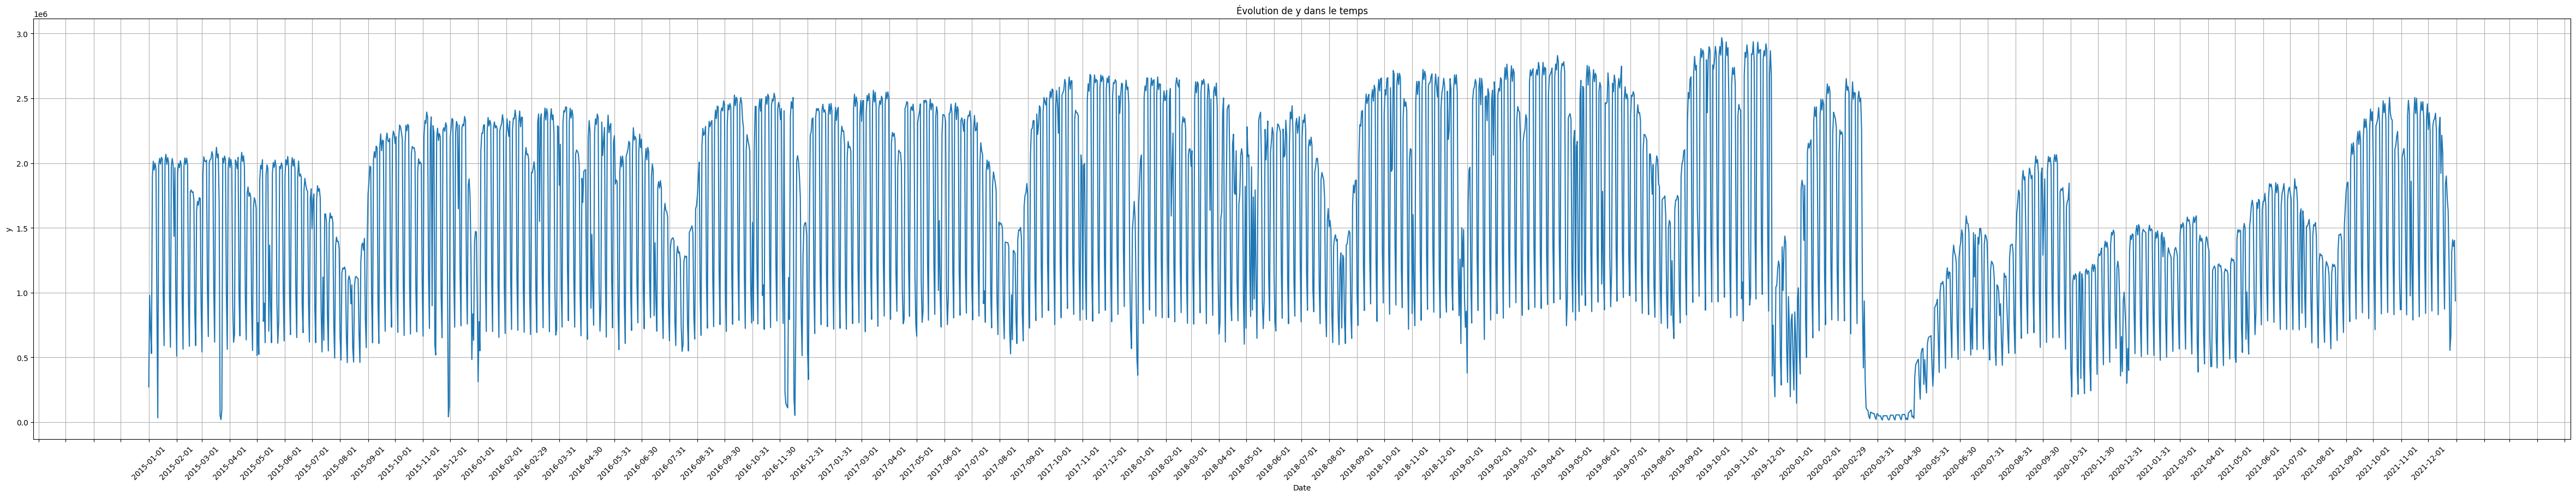

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# display y in time

df_display = df[df['date'] < '2022-01-01']
df_display = df_display.groupby('date').sum().reset_index()

plt.figure(figsize=(60, 10))
plt.plot(df_display['date'], df_display['y'])

plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.xlabel("Date")
plt.ylabel("y")
plt.title("Évolution de y dans le temps")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Un tick tous les 6 mois

plt.grid()
plt.show()


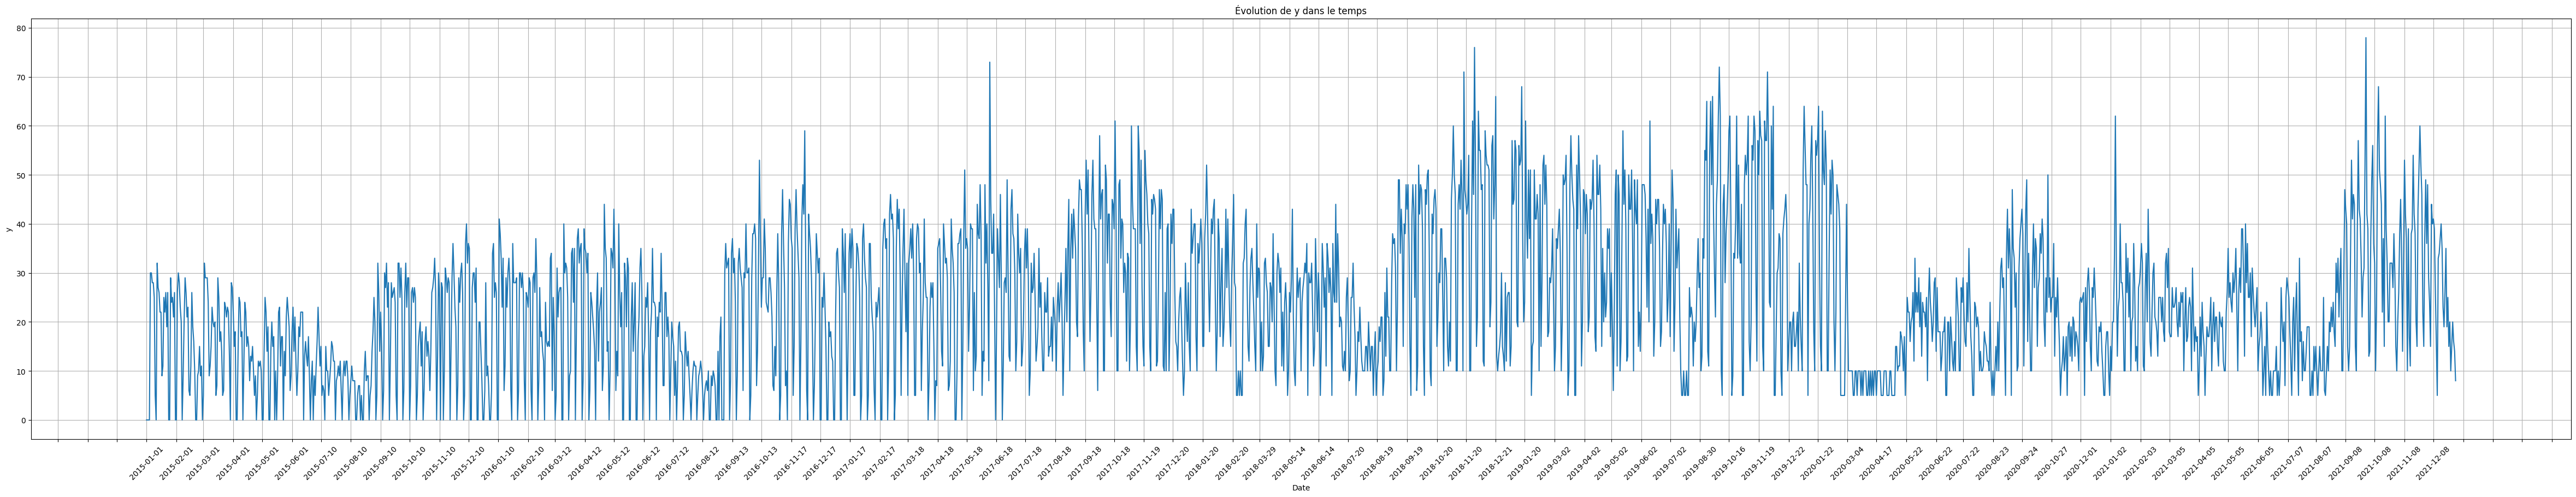

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# display y in time

df_display = df[df['date'] < '2022-01-01']
df_display = df_display[df_display['station'] == 1]

plt.figure(figsize=(60, 10))
plt.plot(df_display['date'], df_display['y'])

plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.xlabel("Date")
plt.ylabel("y")
plt.title("Évolution de y dans le temps")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Un tick tous les 6 mois

plt.grid()
plt.show()


In [11]:
df_display[df_display['date'] == '2015-01-01']['y'].sum()

np.int64(273366)

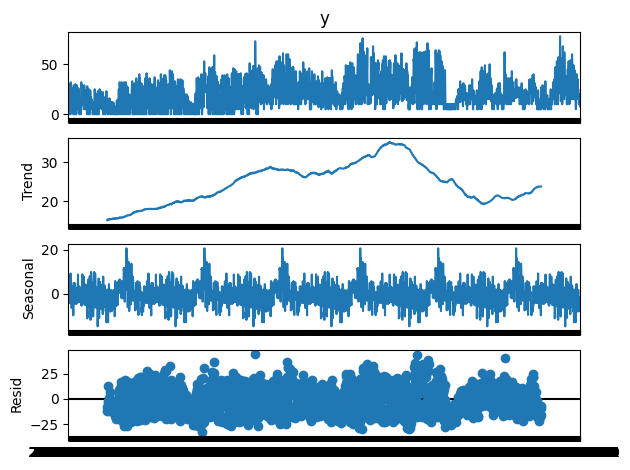

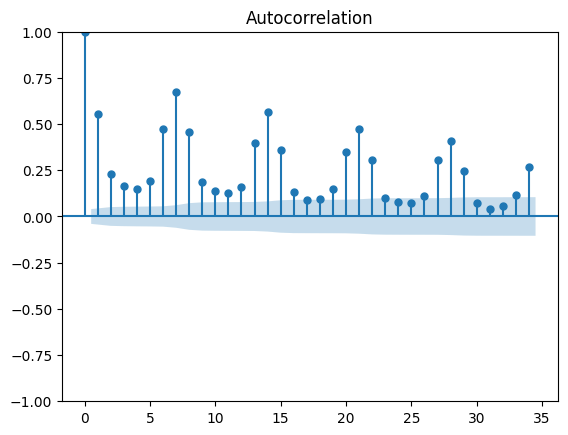

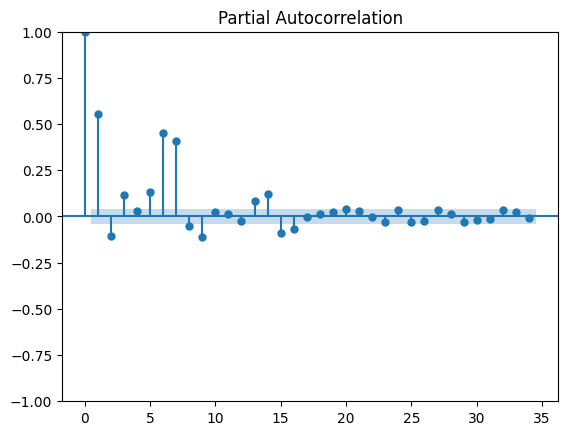

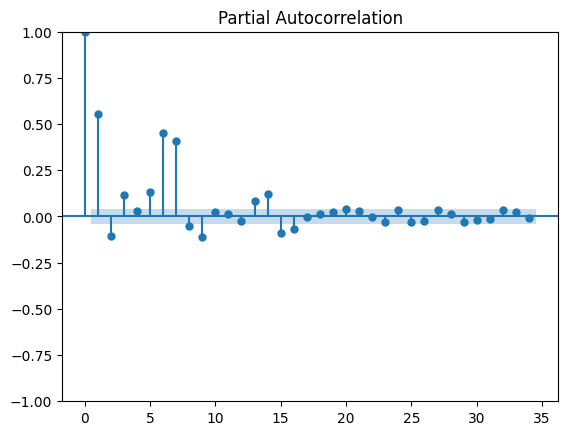

In [49]:
# model ARIMA

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_display = df_display.set_index('date')

decomposition = seasonal_decompose(df_display['y'], model='additive', period=365)
decomposition.plot()
plt.show()

plot_acf(df_display['y'])
plt.show()

plot_pacf(df_display['y'])